<a href="https://colab.research.google.com/github/ameer-fice/Innovation-Camp---DA/blob/main/Choco_Bar_Ratings_Data_Analytics_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Load the dataset and display top 2 values**

In [1]:
import pandas as pd
df = pd.read_csv('flavors.csv')
df.head(2)

# csv - comma separated values

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo


# **2. Remove unwanted characters in the column names and keep all the letters in lowercase**

In [2]:
df.columns = df.columns.str.replace('\n','_')
df.columns = df.columns.str.lower()
df.columns

Index(['company _(maker-if known)', 'specific bean origin_or bar name', 'ref',
       'review_date', 'cocoa_percent', 'company_location', 'rating',
       'bean_type', 'broad bean_origin'],
      dtype='object')

In [3]:
df.columns[-1]

'broad bean_origin'

In [4]:
df = df.rename(columns={df.columns[0]:'company',
          df.columns[1]:'bean_origin',
          df.columns[-1]:'broad_bean_origin'})
df.head()

,company,bean_origin,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_bean_origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


## **3. Which rating is the most popular for chocolates?**

In [5]:
# Method 2
r = df['rating'].value_counts().sort_index(ascending=True)
r

1.00      4
1.50     10
1.75      3
2.00     32
2.25     14
2.50    127
2.75    259
3.00    341
3.25    303
3.50    392
3.75    210
4.00     98
5.00      2
Name: rating, dtype: int64

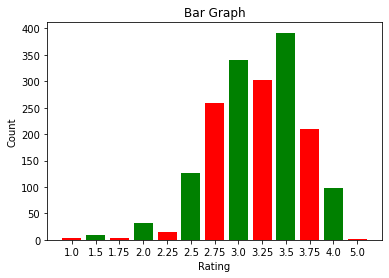

In [6]:
import matplotlib.pyplot as plt
plt.bar(r.index.astype(str),r,color=['r','g'])
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Bar Graph')
plt.show()

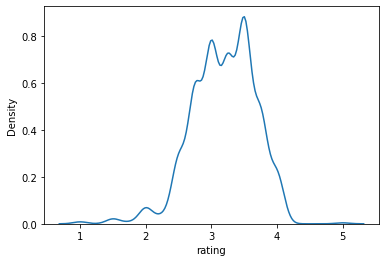

In [7]:
import seaborn as sns
sns.kdeplot(df['rating'])

# **4. Checking for missing values**

In [8]:
df.isnull().sum()

company              0
bean_origin          0
ref                  0
review_date          0
cocoa_percent        0
company_location     0
rating               0
bean_type            1
broad_bean_origin    1
dtype: int64

In [9]:
# Check for np.where and use it with isnull()
df[['bean_type']]

,bean_type
0,
1,
2,
3,
4,
...,...
1790,
1791,Forastero
1792,Forastero
1793,


In [10]:
df['bean_type'].unique()
# \xa0 is actually non-breaking space in Latin1 (ISO 8859-1)

array(['\xa0', 'Criollo', 'Trinitario', 'Forastero (Arriba)', 'Forastero',
       'Forastero (Nacional)', 'Criollo, Trinitario',
       'Criollo (Porcelana)', 'Blend', 'Trinitario (85% Criollo)',
       'Forastero (Catongo)', 'Forastero (Parazinho)',
       'Trinitario, Criollo', 'CCN51', 'Criollo (Ocumare)', 'Nacional',
       'Criollo (Ocumare 61)', 'Criollo (Ocumare 77)',
       'Criollo (Ocumare 67)', 'Criollo (Wild)', 'Beniano', 'Amazon mix',
       'Trinitario, Forastero', 'Forastero (Arriba) ASS', 'Criollo, +',
       'Amazon', 'Amazon, ICS', 'EET', 'Blend-Forastero,Criollo',
       'Trinitario (Scavina)', 'Criollo, Forastero', 'Matina',
       'Forastero(Arriba, CCN)', 'Nacional (Arriba)',
       'Forastero (Arriba) ASSS', 'Forastero, Trinitario',
       'Forastero (Amelonado)', nan, 'Trinitario, Nacional',
       'Trinitario (Amelonado)', 'Trinitario, TCGA', 'Criollo (Amarru)'],
      dtype=object)

In [11]:
df['bean_type'].value_counts()

# Replace the space with missing value and change it with mode

                            887
Trinitario                  419
Criollo                     153
Forastero                    87
Forastero (Nacional)         52
Blend                        41
Criollo, Trinitario          39
Forastero (Arriba)           37
Criollo (Porcelana)          10
Trinitario, Criollo           9
Forastero (Parazinho)         8
Forastero (Arriba) ASS        6
EET                           3
Beniano                       3
Matina                        3
Nacional (Arriba)             3
Amazon mix                    2
Forastero (Catongo)           2
Criollo, Forastero            2
Trinitario (85% Criollo)      2
Trinitario, Forastero         2
Criollo (Amarru)              2
Nacional                      2
Amazon, ICS                   2
Criollo (Ocumare 61)          2
Forastero (Amelonado)         1
Criollo (Wild)                1
Trinitario, TCGA              1
Forastero(Arriba, CCN)        1
Criollo, +                    1
Criollo (Ocumare 77)          1
Foraster

In [12]:
df['bean_type'] = df['bean_type'].replace({'\xa0':None})
df['bean_type'] = df['bean_type'].fillna(df['bean_type'].mode()[0])
df['bean_type']

# https://stackoverflow.com/questions/38117016/update-pandas-dataframe-with-str-replace-vs-replace

0       Trinitario
1       Trinitario
2       Trinitario
3       Trinitario
4       Trinitario
           ...    
1790    Trinitario
1791     Forastero
1792     Forastero
1793    Trinitario
1794    Trinitario
Name: bean_type, Length: 1795, dtype: object

In [13]:
df['bean_type'].mode()

0    Trinitario
dtype: object

# **5. Corrections of words in the column by removing punctuations. Plot top 5 Bean Types**

In [14]:
b = df['bean_type'].value_counts().head()
b

Trinitario              1307
Criollo                  153
Forastero                 87
Forastero (Nacional)      52
Blend                     41
Name: bean_type, dtype: int64

Text(0, 0.5, 'Count')

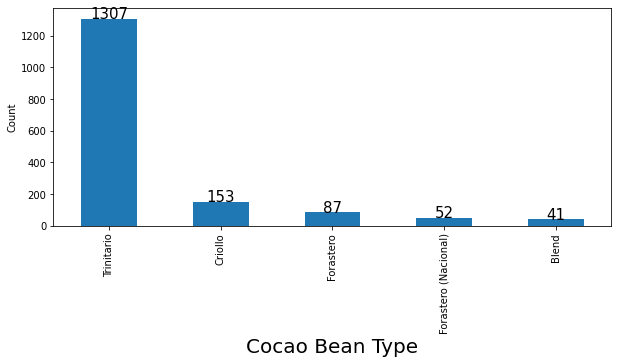

In [15]:
# Pandas Plotting

b.plot(kind='bar',figsize=(10,4))
for i in range(len(b)):
  plt.text(i,b[i],b[i],fontsize=15,ha='center')
plt.xlabel('Cocao Bean Type',fontsize=20)
plt.ylabel('Count')

# **6. Cocoa percent over the years**

In [16]:
df['cocoa_percent'] = df['cocoa_percent'].str.replace('%','').astype(float)/100
df['cocoa_percent']

0       0.63
1       0.70
2       0.70
3       0.70
4       0.70
        ... 
1790    0.70
1791    0.65
1792    0.65
1793    0.62
1794    0.65
Name: cocoa_percent, Length: 1795, dtype: float64

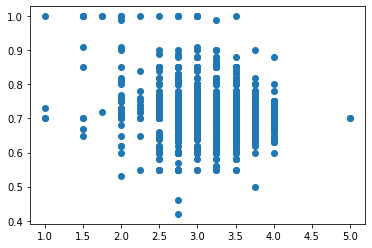

In [17]:
plt.scatter(df['rating'],df['cocoa_percent'])
plt.show()

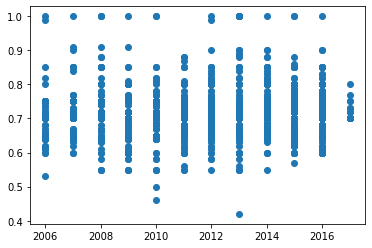

In [18]:
plt.scatter(df['review_date'],df['cocoa_percent'])
plt.show()

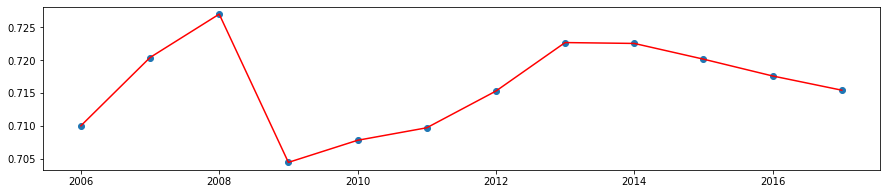

In [19]:
# 1st Method
cocoa = df[['review_date','cocoa_percent']]
cocoa_avg = []
for i in range(2006,2018):
  cocoa_avg.append(cocoa[cocoa['review_date']==i].mean()['cocoa_percent'])

plt.figure(figsize=(15,3))
plt.scatter(range(2006,2018),cocoa_avg)
plt.plot(range(2006,2018),cocoa_avg,color='r')

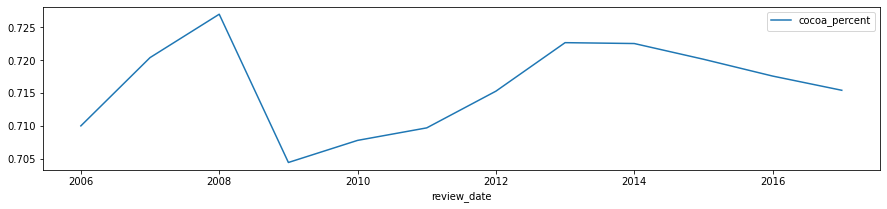

In [20]:
# Groupby ; Method in Pandas which creates DF/Series based on certain condition

df1 = df.groupby('review_date').aggregate({'cocoa_percent':'mean'})
df1.plot(figsize=(15,3))

Interestingly, In the year 2008, the cocoa percentage in chocolate was highest and the average rating happened to be the lowest.

The following year in 2009, the chocolate bars saw a steep decline in cocoa percentage, with an increase in average rating. This might indicate that chocolate bar producers decreased their cocoa content to make better chocolates.

# **7. Which company is mentioned multiple times?**

In [21]:
# Seaborn is an advanced data visualization library built on top of matplotlib
d = df['company'].value_counts().head(5)
d = pd.DataFrame(d)
d = d.reset_index()
d

,index,company
0,Soma,47
1,Bonnat,27
2,Fresco,26
3,Pralus,25
4,A. Morin,23


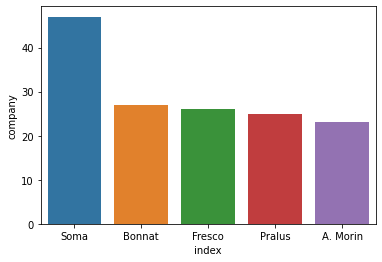

In [22]:
import seaborn as sns
sns.barplot(x ='index',y='company',data=d)

# **8. Consider Ratings and divide them into different categories and plot a pie chart**

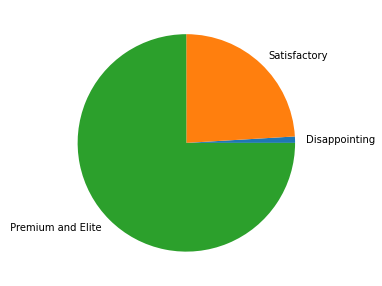

In [23]:
label = ['Disappointing','Satisfactory',' Premium and Elite']

disapoint = df[df['rating']<2]
satisfactory = df[(df['rating']>=2.0) &(df['rating']<3.0)]
premium_elite = df[df['rating']>=3.0]

x = [disapoint.shape[0],satisfactory.shape[0],premium_elite.shape[0]]
plt.figure(figsize=(5,5))
plt.pie(x,labels=label)
plt.show()

# **9. Feature Generation. We can classify the chocolates into Dark, Normal chocolates.**

In [24]:
df[df['cocoa_percent']<0.7].sample(10)
df['chocolate_type'] = df['cocoa_percent'].apply(lambda x: 'dark' if x>=0.7 else 'normal')

In [25]:
df['chocolate_type'].value_counts()

dark      1467
normal     328
Name: chocolate_type, dtype: int64

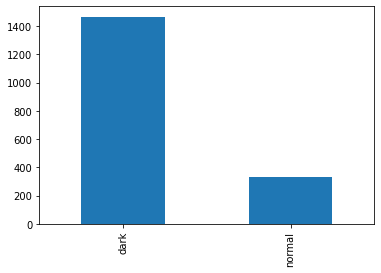

In [26]:
df['chocolate_type'].value_counts().plot(kind='bar')

We have much Dark chocolates than normal

## **10. Where the best cocoa beans are grown (based on rating)**

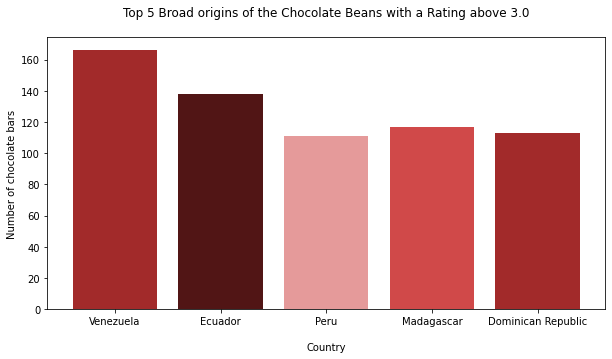

{'Venezuela': 166, 'Ecuador': 138, 'Peru': 111, 'Madagascar': 117, 'Dominican Republic': 113}


In [27]:
countries=df['broad_bean_origin'].value_counts().index.tolist()[:5]
satisfactory={} 
for j in countries:
    c=0
    b=df[df['broad_bean_origin']==j]
    br=b[b['rating']>=3] 
    for i in br['rating']:
        c+=1
        satisfactory[j]=c    

# Code to visualize the countries that give best cocoa beans
li=satisfactory.keys()
plt.figure(figsize=(10,5))
plt.bar(range(len(satisfactory)), satisfactory.values(), align='center',color=['#a22a2a','#511515','#e59a9a','#d04949','#a22a2a'])
plt.xticks(range(len(satisfactory)), list(li))
plt.xlabel('\nCountry')
plt.ylabel('Number of chocolate bars')
plt.title("Top 5 Broad origins of the Chocolate Beans with a Rating above 3.0\n")
plt.show()

print(satisfactory)

## **Analysing the top chocolate bar producing countries (in terms of quantity)**

Top Chocolate Producing Countries in the World

U.S.A.    764
France    156
Canada    125
U.K.       96
Italy      63
Name: company_location, dtype: int64


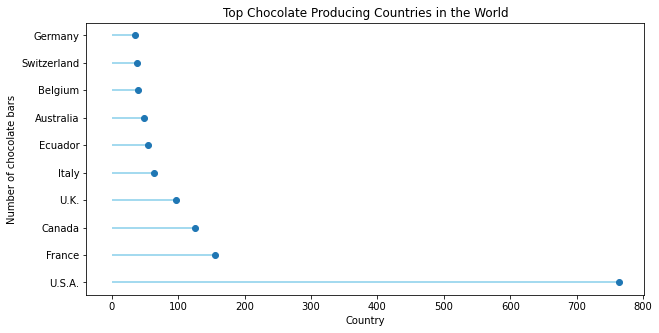

In [28]:
print ('Top Chocolate Producing Countries in the World\n')
country=list(df['company_location'].value_counts().head(10).index)
choco_bars=list(df['company_location'].value_counts().head(10))
prod_ctry=dict(zip(country,choco_bars))
print(df['company_location'].value_counts().head())

plt.figure(figsize=(10,5))
plt.hlines(y=country,xmin=0,xmax=choco_bars,color='skyblue')
plt.plot(choco_bars,country,"o")
plt.xlabel('Country')
plt.ylabel('Number of chocolate bars')
plt.title("Top Chocolate Producing Countries in the World")
plt.show()